In [2]:
import pandas as pd
from imageio import imread
import matplotlib.pyplot as plt

In [3]:
listingphotos = pd.read_csv('data/listing_photos.csv')

#### Replace space in url with %20

In [7]:
listingphotos.URL_BIG = listingphotos.URL_BIG.str.replace(' ', '%20')

#### Initialize & store images

In [149]:
height = []
width = []
image_area = []
for i in list(listingphotos.URL_BIG):
    img = imread(i)
    area = img.shape[0]*img.shape[1]
    height.append(img.shape[0])
    width.append(img.shape[1])
    image_area.append(area)

#### Plot counts by height

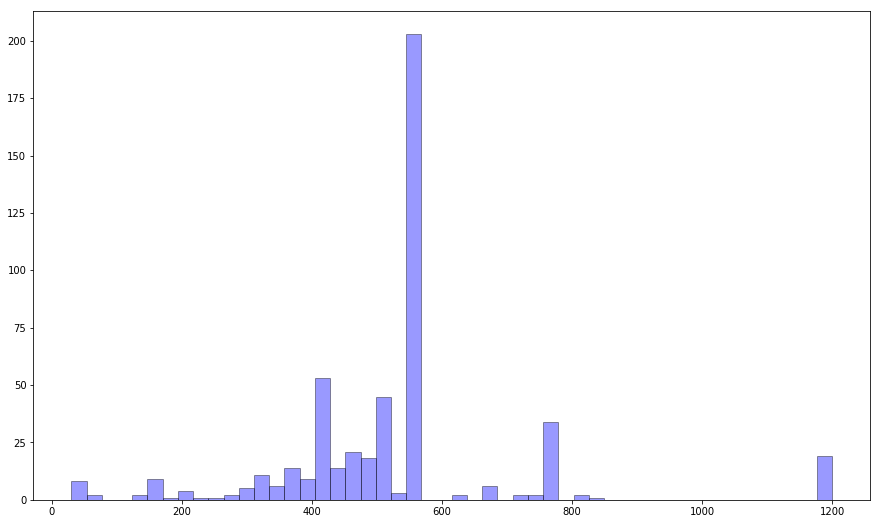

In [258]:
ax = plt.subplots(figsize=(15, 9))
sns.distplot(height, hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [106]:
height_arr = pd.np.array(height)
height_mean = height_arr.mean()
height_sd = 2*pd.np.std(height_arr)

In [107]:
height_mean

529.802

In [108]:
height_sd

385.1887786319845

## Remove photos with height 2 sd below mean

#### todo: Keep images in an array

In [169]:
height_results = []

In [170]:
%%time 

import numpy as np

for i in list(listingphotos.URL_BIG):
    img = imread(i)
    height = img.shape[0]
    if height < abs(height_mean - 2 * height_sd):
        height_r = {"url":i, "verdict":"crappy", "height": height}
    else:
        height_r = {"url":i, "verdict":"not crappy", "height": height}
    height_results.append(height_r)

CPU times: user 25.3 s, sys: 2.2 s, total: 27.5 s
Wall time: 1min 16s


### Eyeball performance

In [172]:
height_results_df = pd.DataFrame(height_results)
height_not_crappy = height_results_df[height_results_df.verdict=="not crappy"]
height_crappy = height_results_df[height_results_df.verdict=="crappy"]

#### Height - not crappy photos

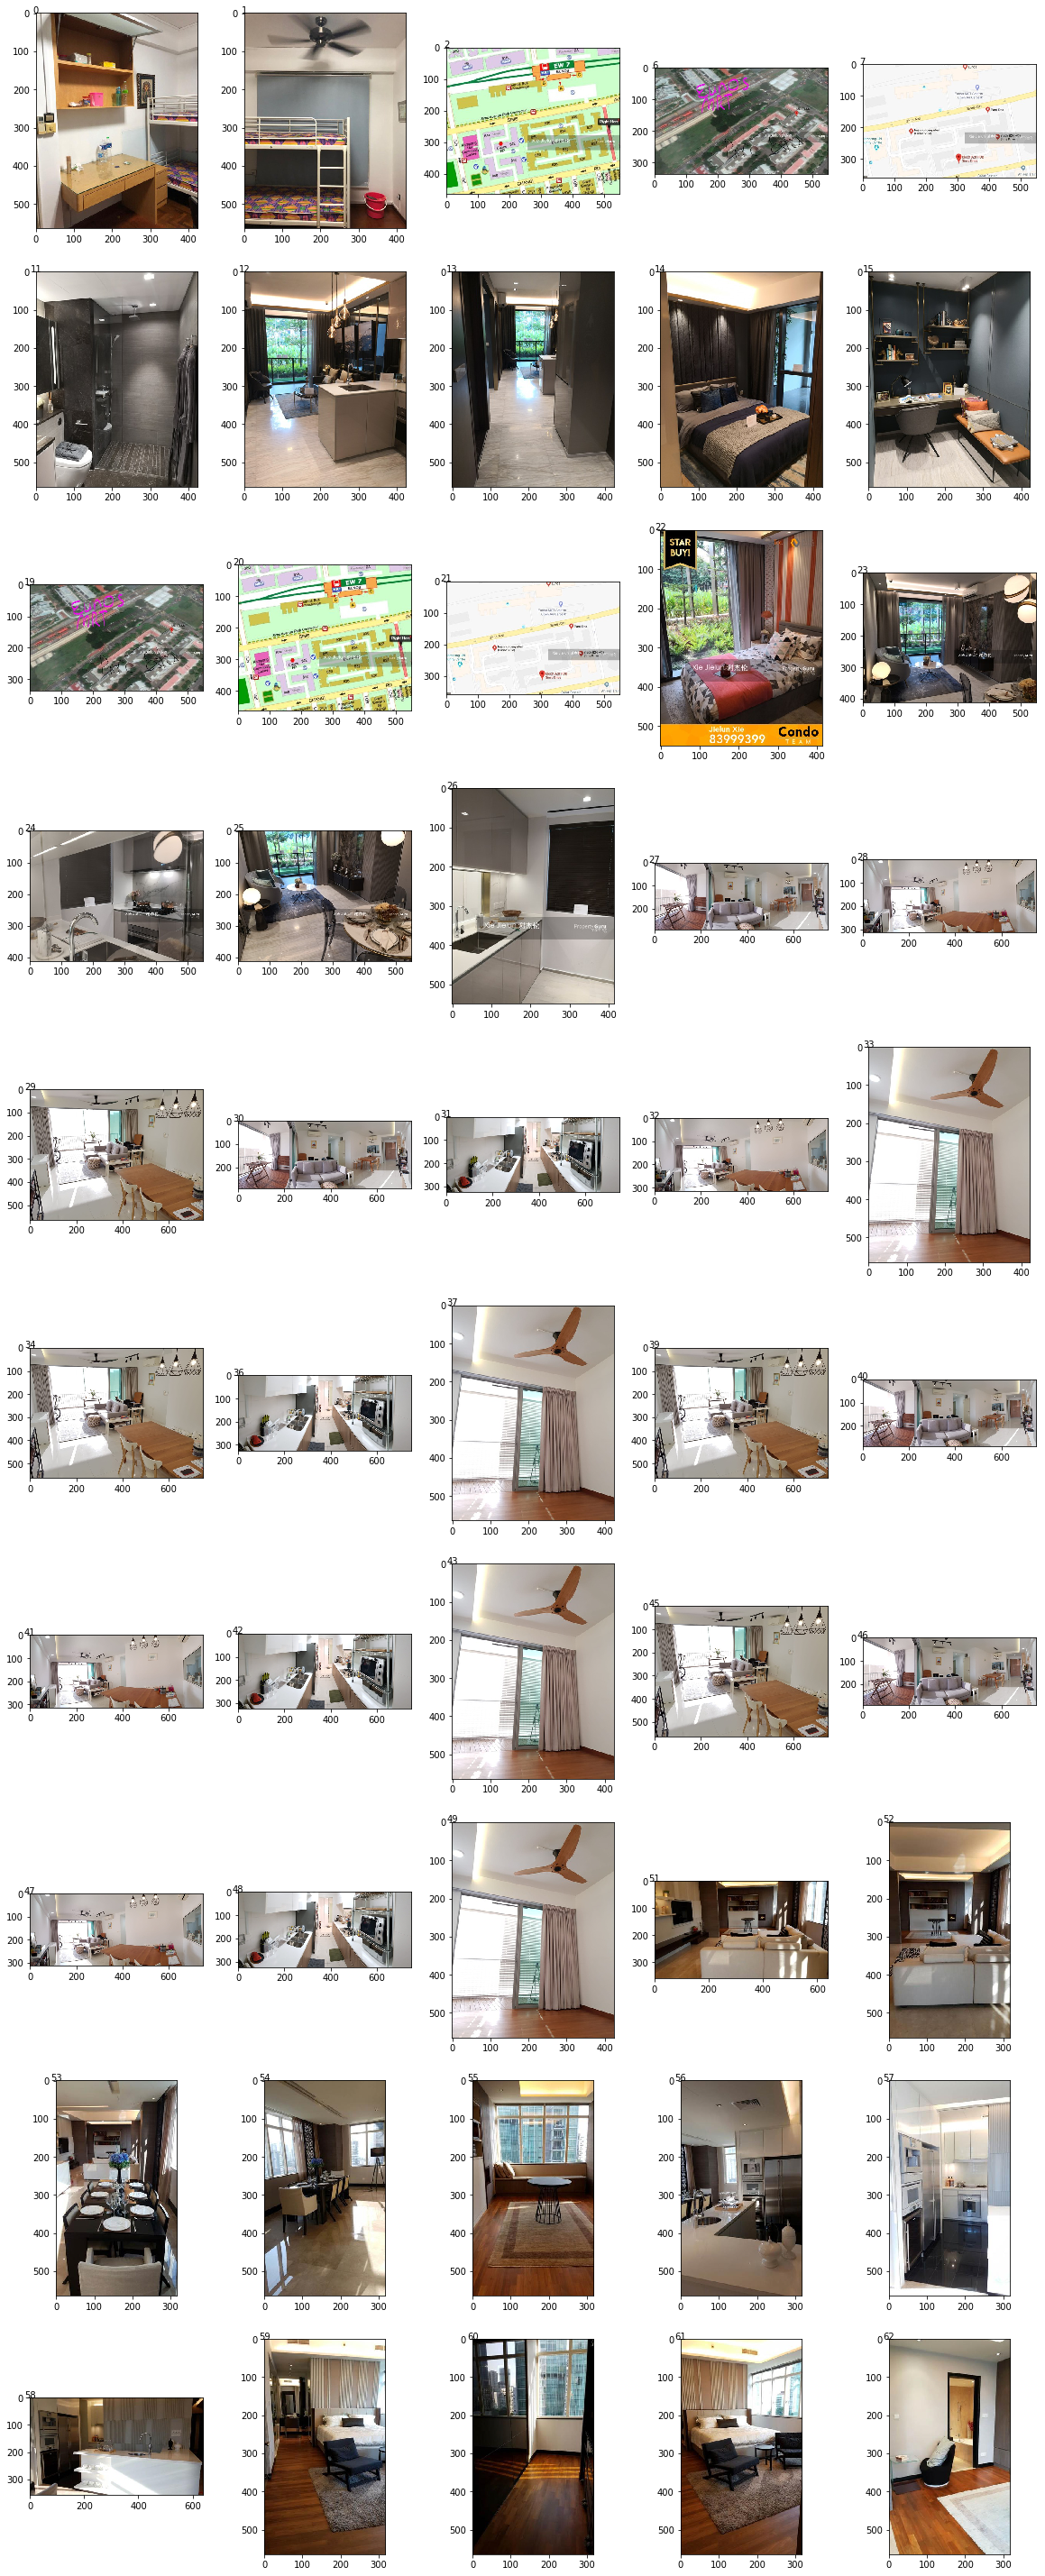

In [218]:
plt.figure(figsize=(20,500))
col = 5
row = int(len(height_not_crappy)/col)+1
for n, i in enumerate(height_not_crappy.url[0:50]):
    ax = plt.subplot(row,col,n+1)
    img = imread(i)
    ax.imshow(img)
    ax.text(0, 0, height_not_crappy.index[n], ha='center') #label img index for reference

#### Height - crappy photos

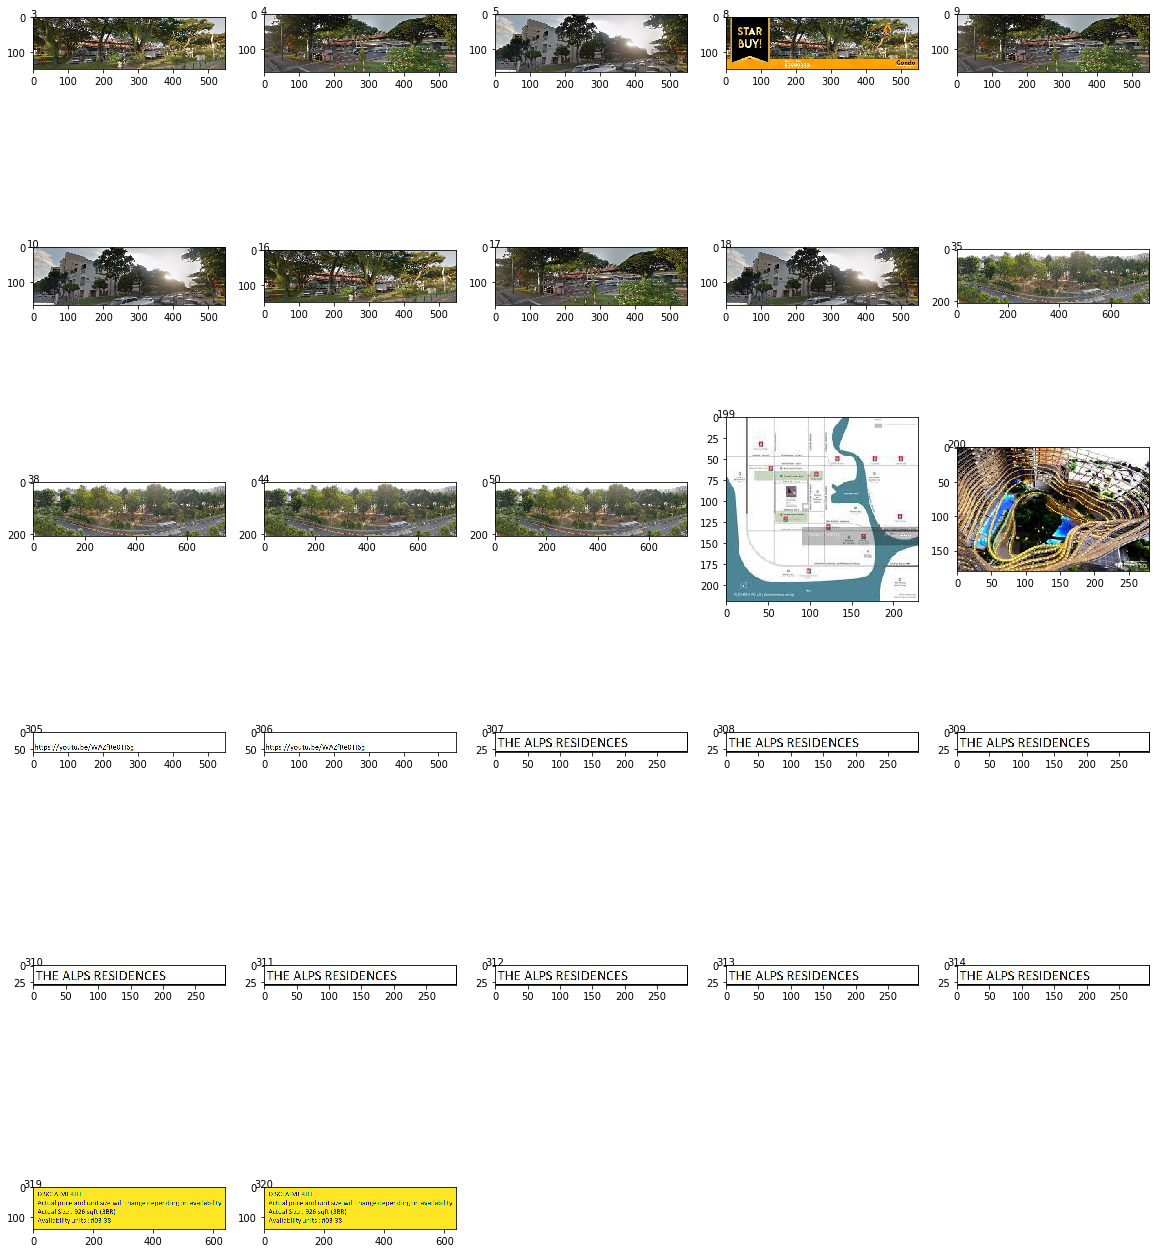

In [219]:
plt.figure(figsize=(20,25))
col = 5
row = int(len(height_crappy)/col)+1
for n, i in enumerate(height_crappy.url[0:50]):
    ax = plt.subplot(row,col,n+1)
    img = imread(i)
    ax.imshow(img)
    ax.text(0, 0, height_crappy.index[n], ha='center') #label img index for reference

### Verification

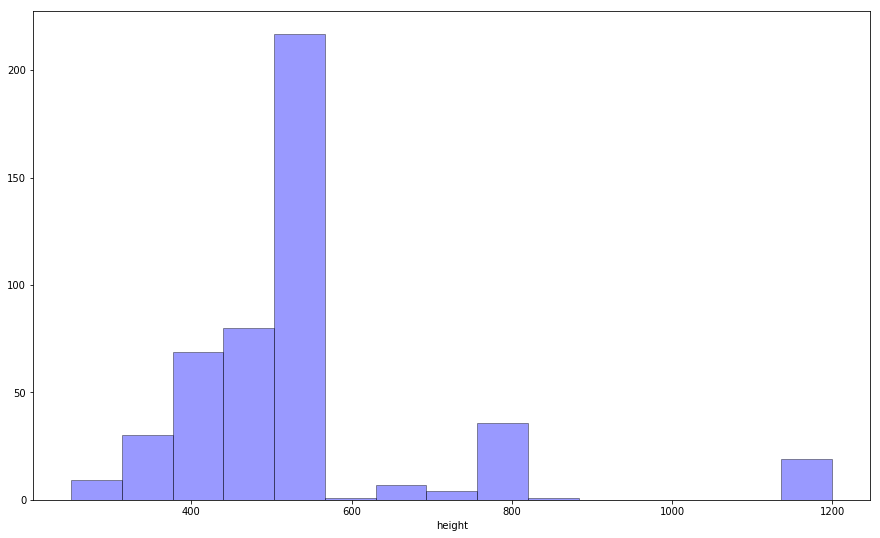

In [259]:
ax = plt.subplots(figsize=(15, 9))
sns.distplot(height_not_crappy.height, hist=True, kde=False, 
             bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})

### Normalized height

In [252]:
height_arr = height_arr.reshape(1, len(height_arr))
normalized_height = pd.np.log(height_arr)
normalized_height_mean = normalized_height.mean()
normalized_height_sd = 2*pd.np.std(normalized_height)

In [253]:
normalized_height_mean

6.183914954012648

In [254]:
normalized_height_sd

1.0093355438001699

#### Plot counts by normalized height

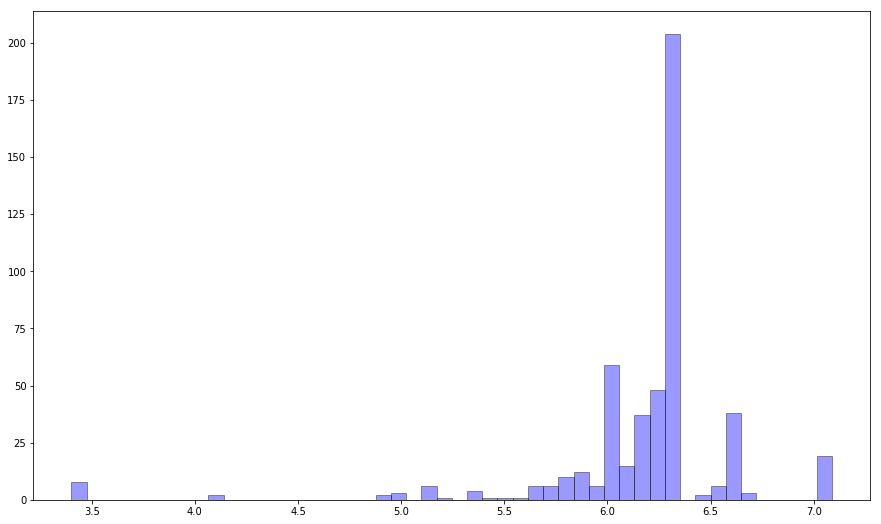

In [257]:
ax = plt.subplots(figsize=(15, 9))
sns.distplot(normalized_height, hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [260]:
normalized_height_mean

6.183914954012648

In [261]:
#mode of numpy array
stats.mode(normalized_height, axis=None)

ModeResult(mode=array([6.33682573]), count=array([122]))

## Remove photos with width 2 sd below mean

#### Plot counts by width

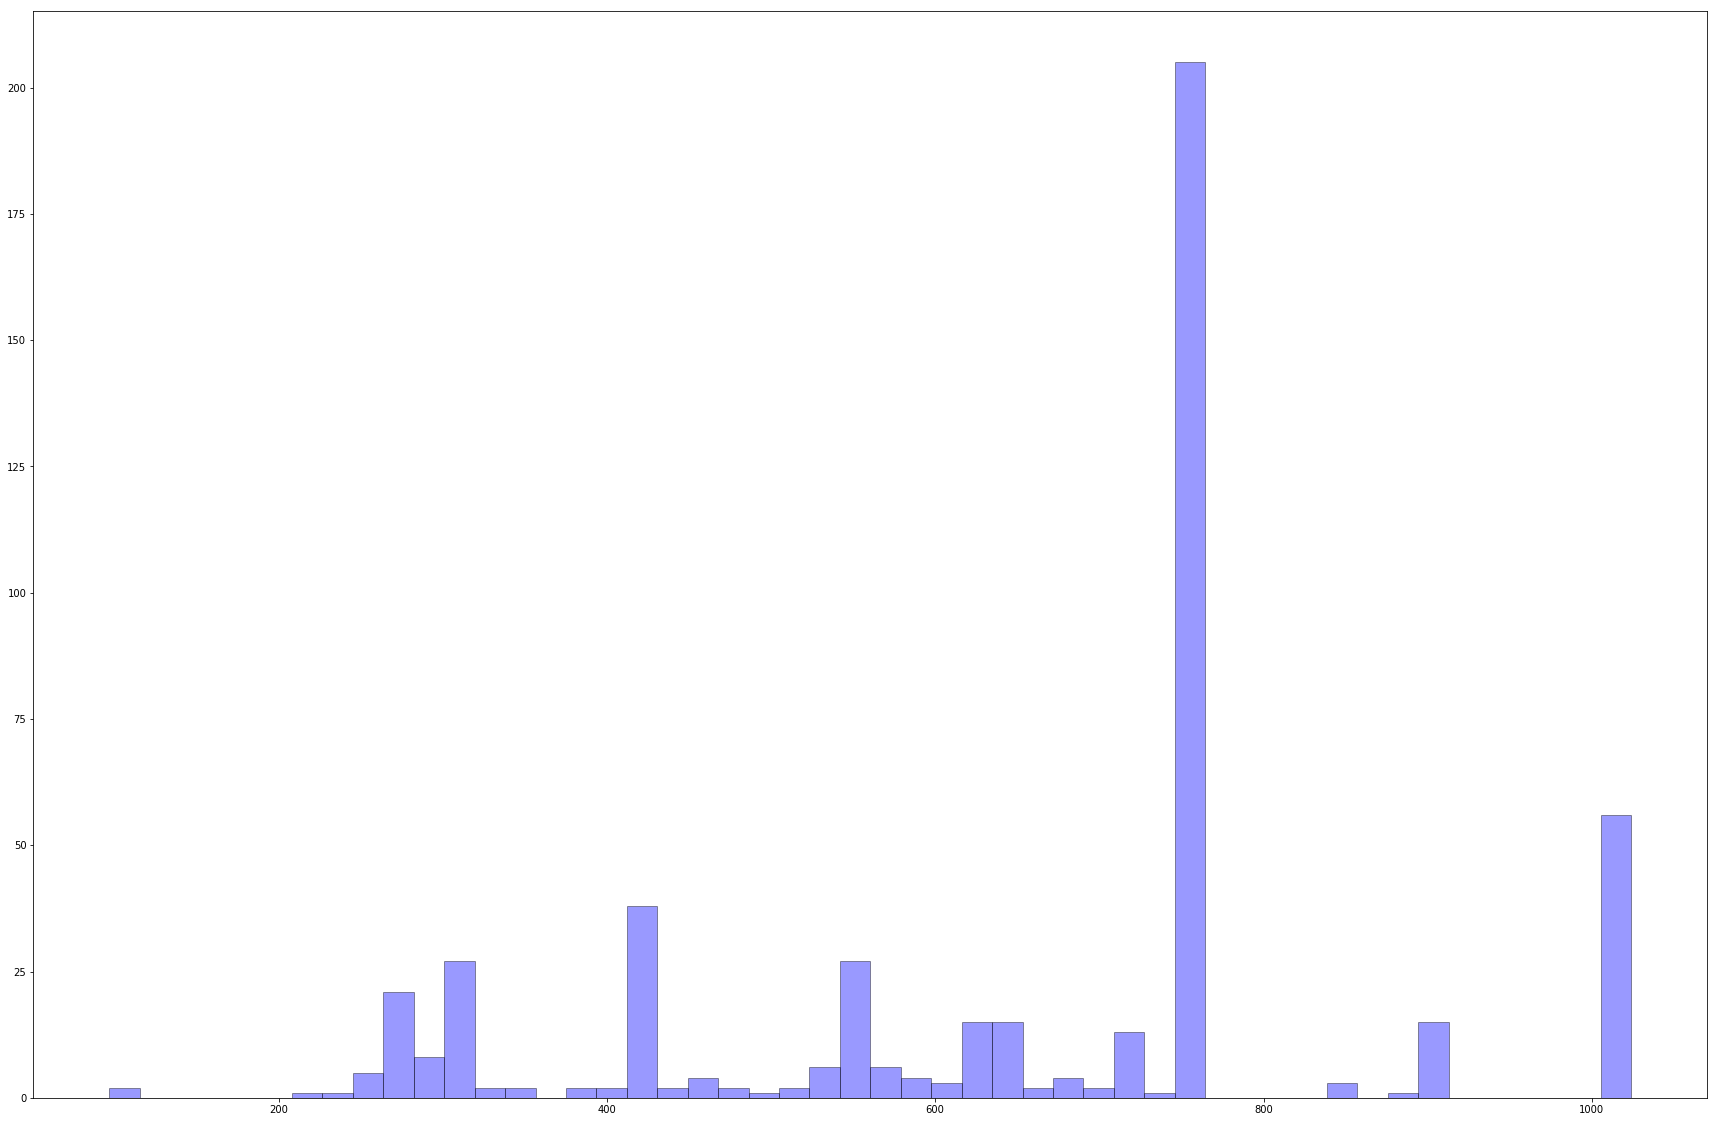

In [243]:
ax = plt.subplots(figsize=(30, 20))
sns.distplot(width, hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [228]:
width_arr = pd.np.array(width)
width_mean = width_arr.mean()
width_sd = 2*pd.np.std(width_arr)

In [244]:
width_mean

661.844

In [245]:
width_sd

429.537852413498

In [229]:
width_results = []

In [230]:
%%time 
for i in list(listingphotos.URL_BIG):
    img = imread(i)
    width = img.shape[1]
    if width < abs(width_mean - 2 * width_sd):
        width_r = {"url":i, "verdict":"crappy", "width": width}
    else:
        width_r = {"url":i, "verdict":"not crappy", "width": width}
    width_results.append(width_r)

CPU times: user 26.4 s, sys: 2.26 s, total: 28.6 s
Wall time: 1min 22s


### Eyeball performance

In [231]:
width_results_df = pd.DataFrame(width_results)
width_not_crappy = width_results_df[width_results_df.verdict=="not crappy"]
width_crappy = width_results_df[width_results_df.verdict=="crappy"]

#### Width - not crappy photos

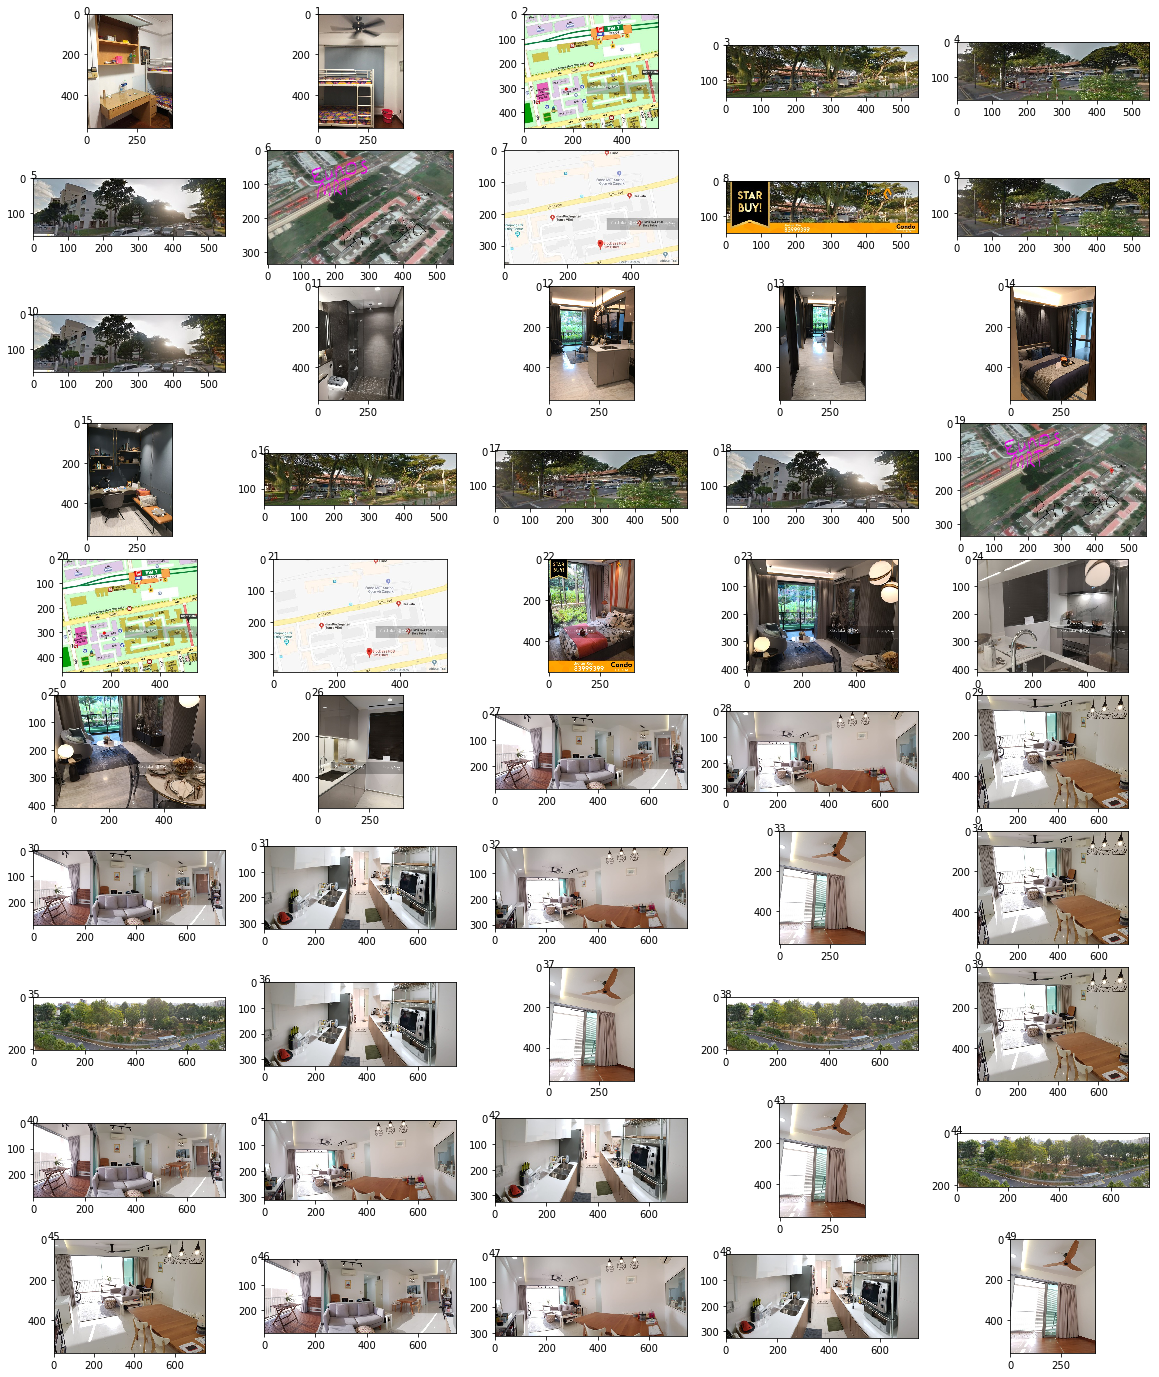

In [242]:
plt.figure(figsize=(20,250))
col = 5
row = int(len(width_not_crappy)/col)+1
for n, i in enumerate(width_not_crappy.url[0:50]):
    ax = plt.subplot(row,col,n+1)
    img = imread(i)
    ax.imshow(img)
    ax.text(0, 0, width_not_crappy.index[n], ha='center') #label img index for reference

#### Width - crappy photos

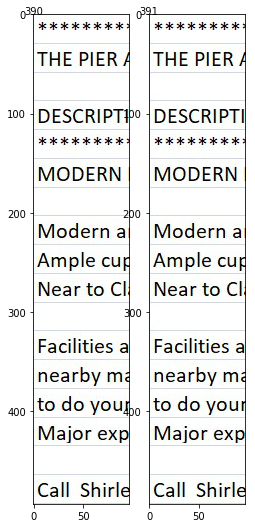

In [236]:
plt.figure(figsize=(10,15))
col = 5
row = int(len(width_crappy)/col)+1
for n, i in enumerate(width_crappy.url):
    ax = plt.subplot(row,col,n+1)
    img = imread(i)
    ax.imshow(img)
    ax.text(0, 0, width_crappy.index[n], ha='center') #label img index for reference

#### Verification

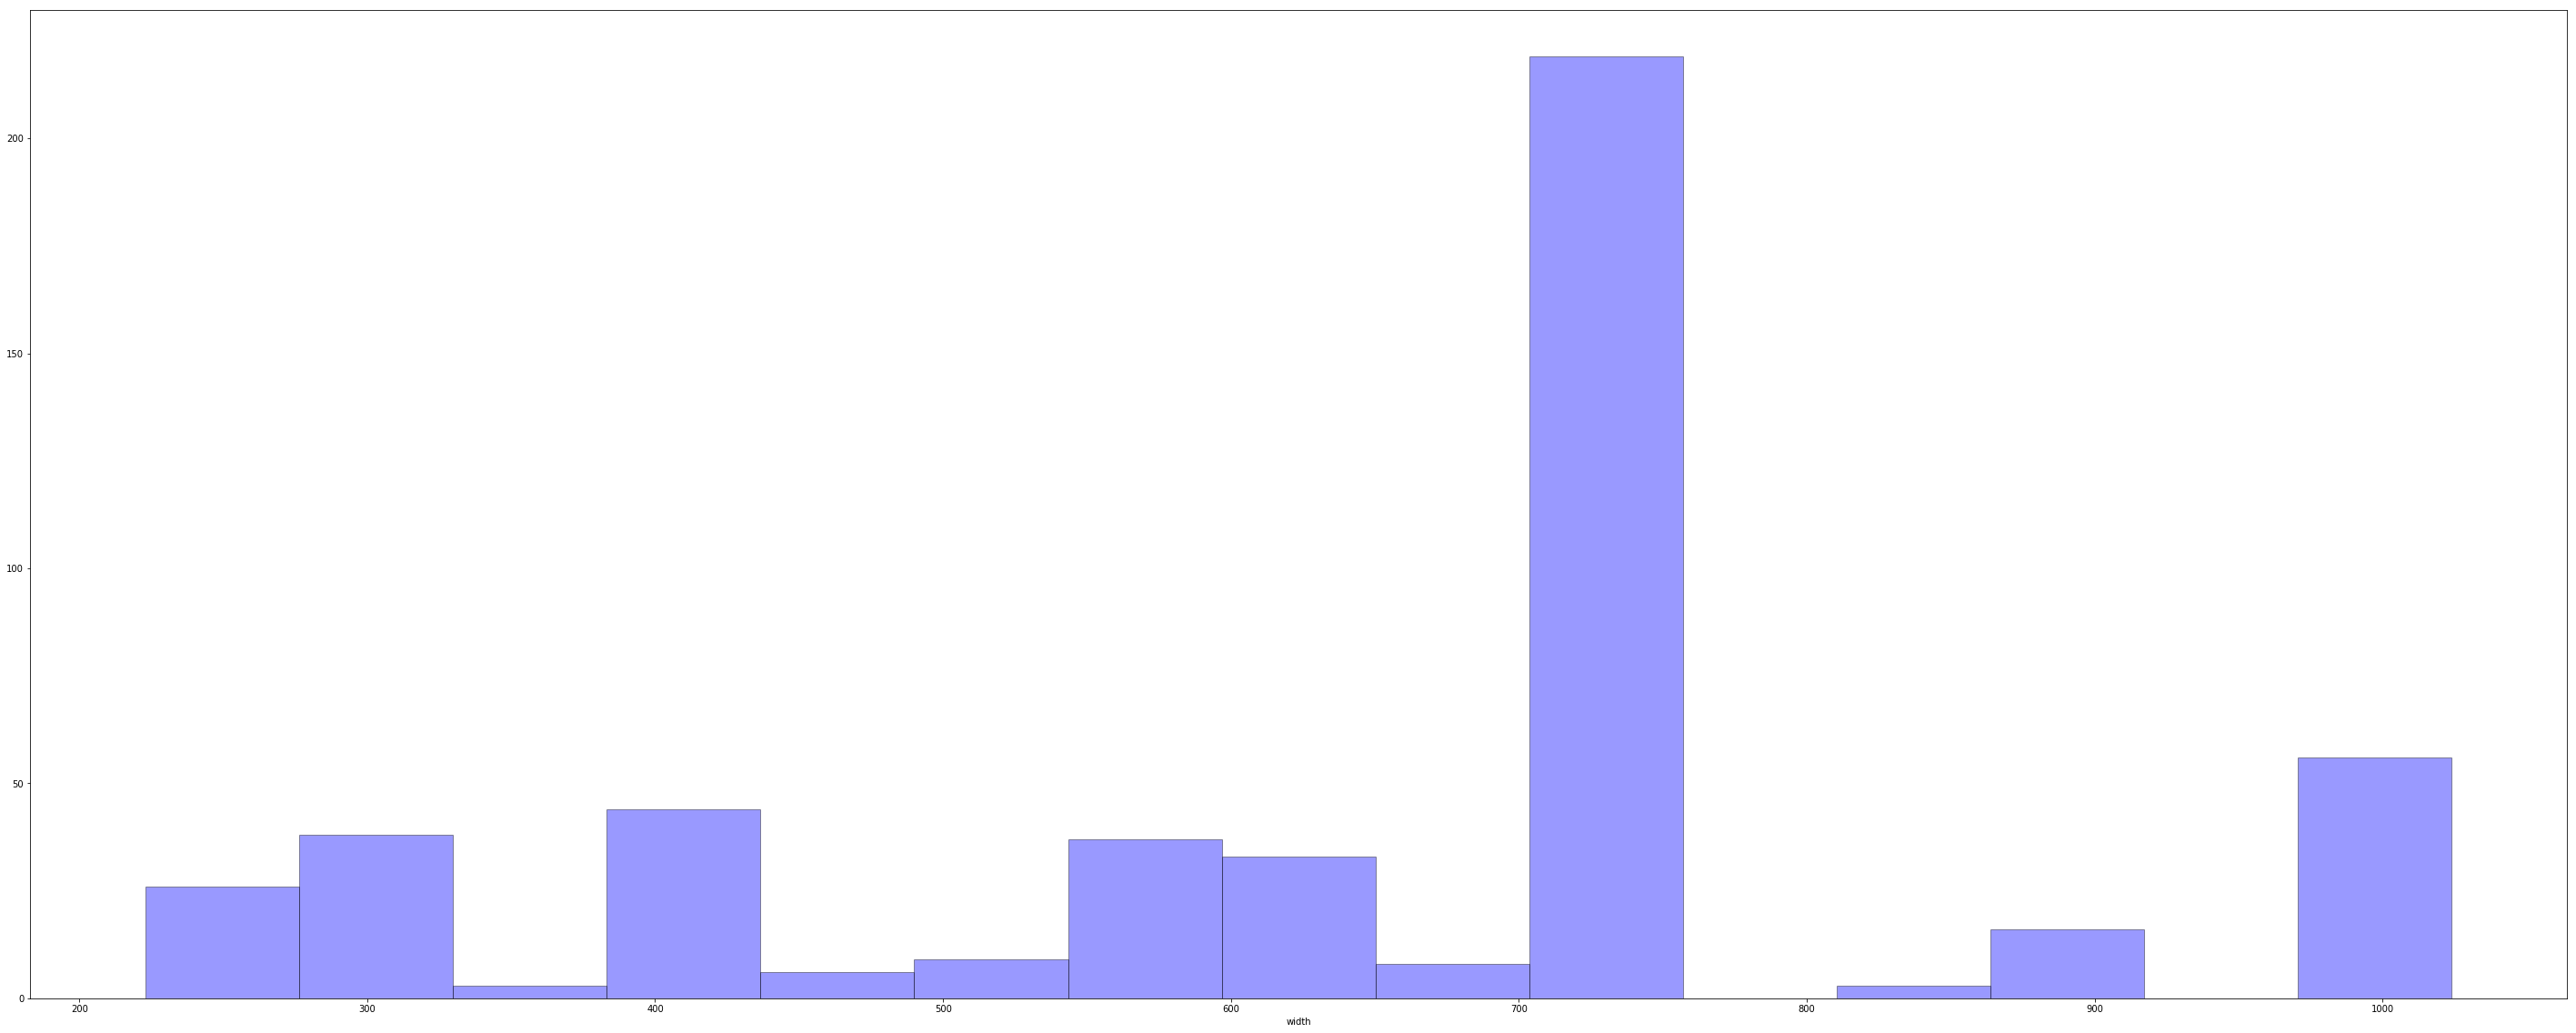

In [247]:
ax = plt.subplots(figsize=(50, 20))
sns.distplot(width_not_crappy.width, hist=True, kde=False, 
             bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})

#### Plot sizes by image area

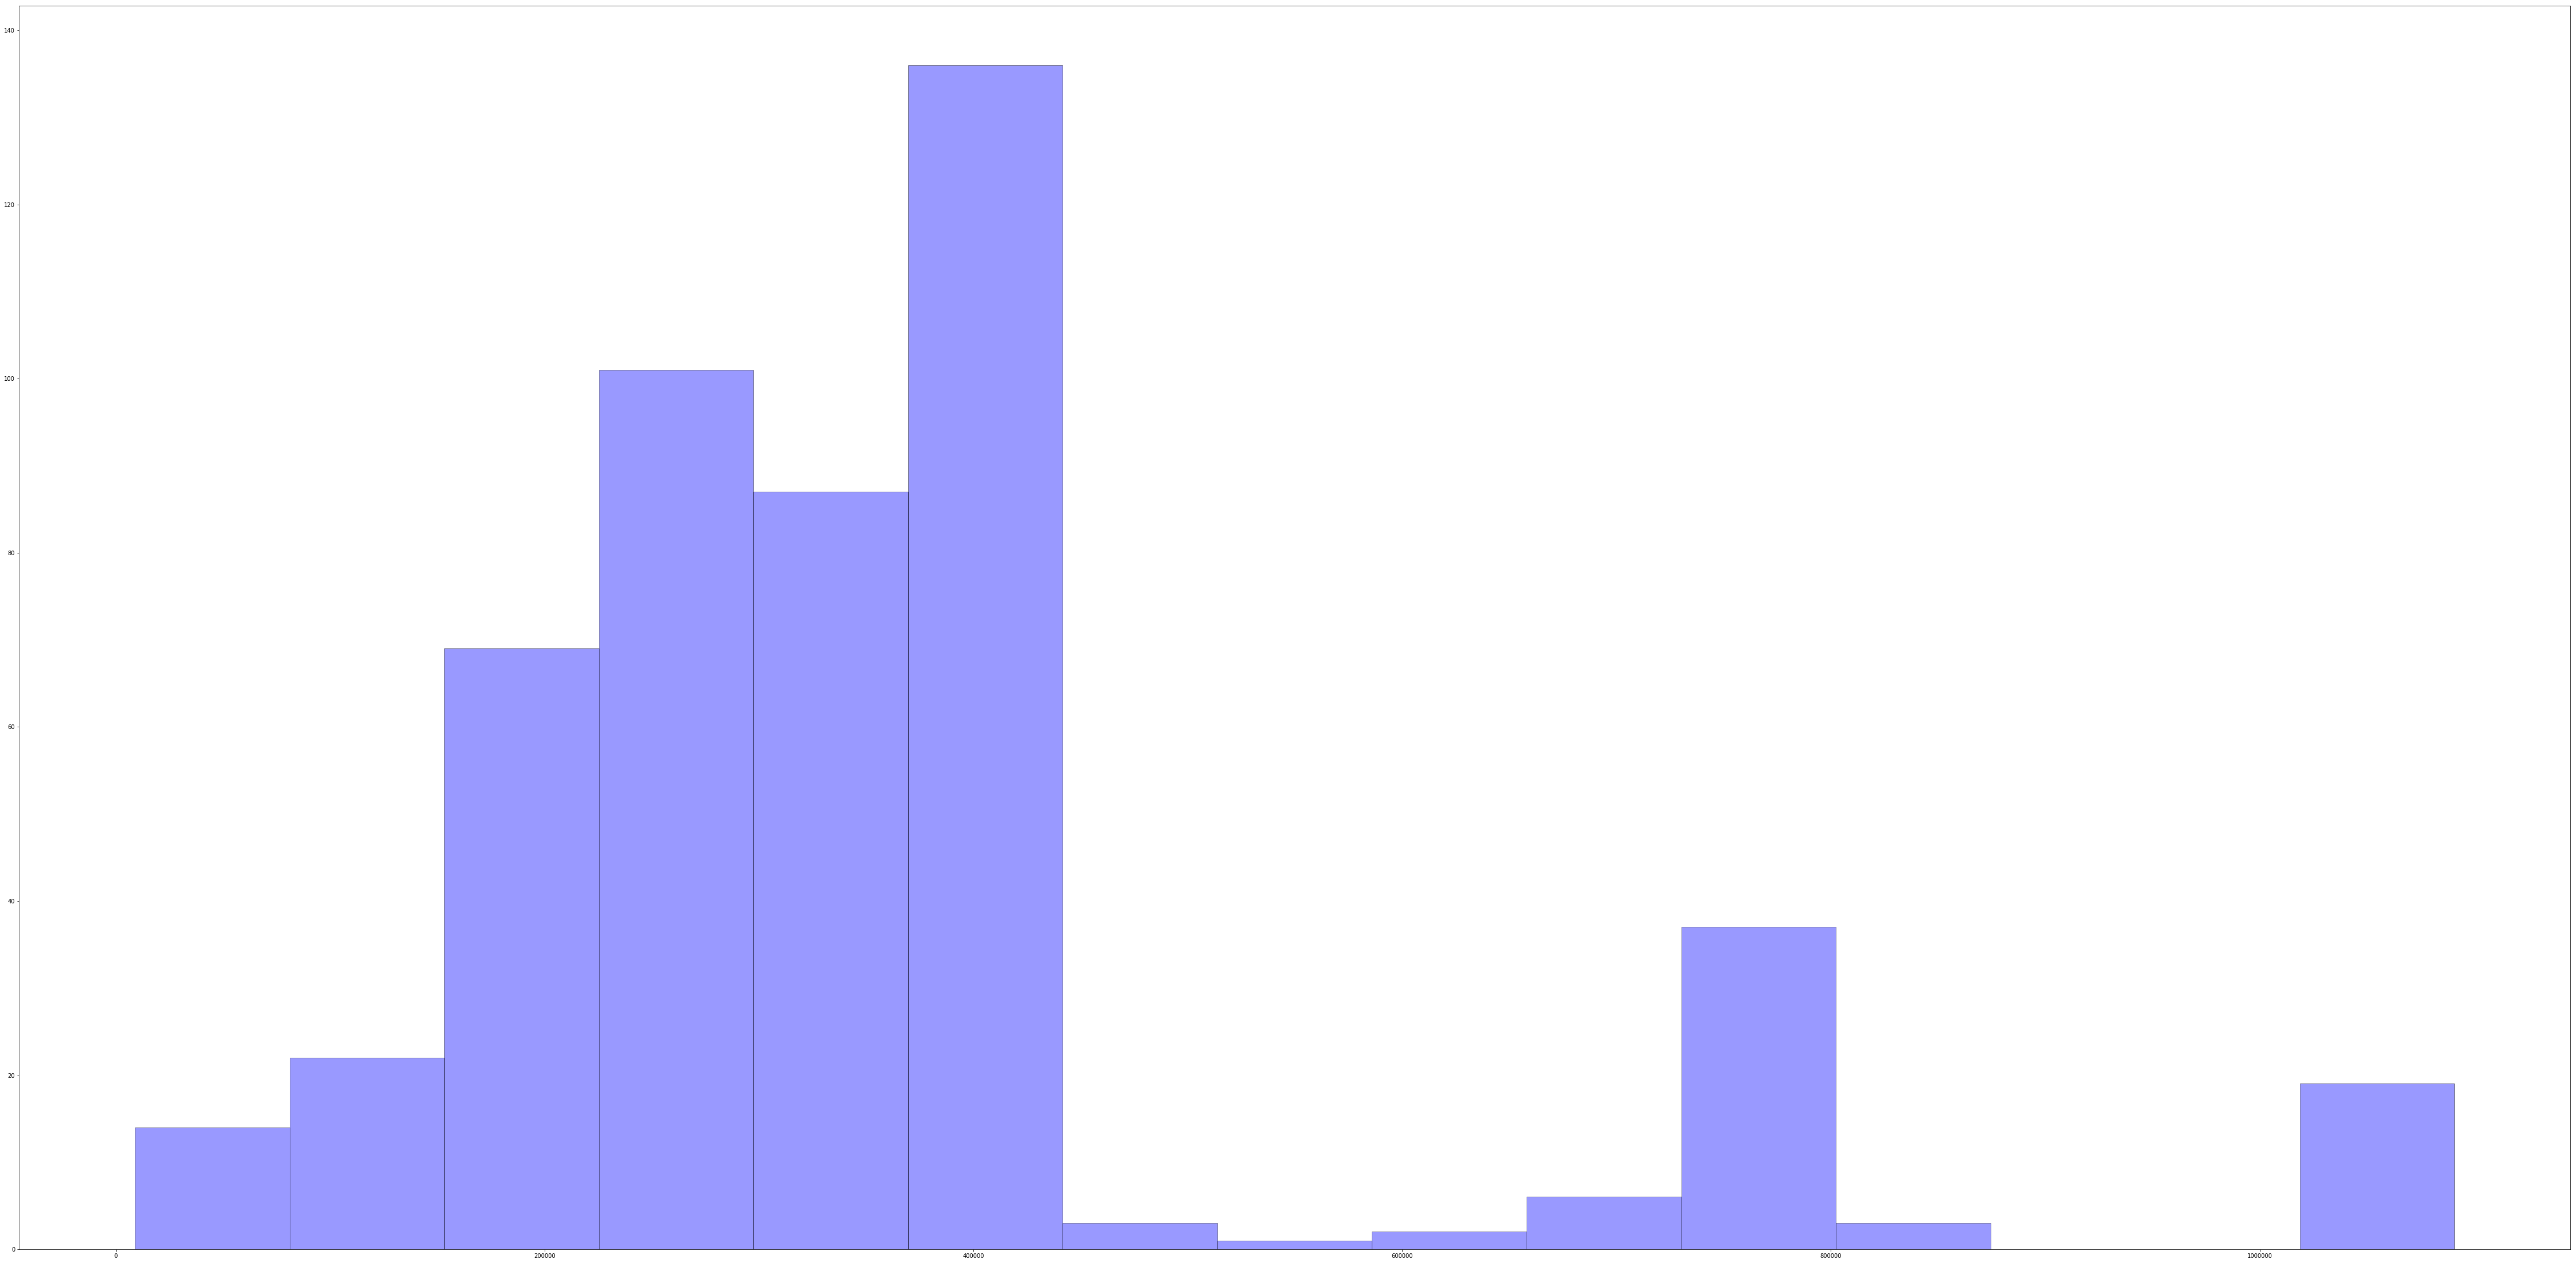

In [9]:
import seaborn as sns

ax = plt.subplots(figsize=(80, 40))
sns.distplot(image_area, hist=True, kde=False, 
             bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})

#### Normalize image size data

In [10]:
from sklearn.preprocessing import normalize as norm

In [11]:
img_arr = pd.np.array(image_area)
img_arr = img_arr.reshape(1, len(img_arr))

In [12]:
normalized_imgsize = pd.np.log(img_arr)

In [45]:
normalized_mean = normalized_imgsize.mean()

In [14]:
normalized_sd = 2*pd.np.std(normalized_imgsize)

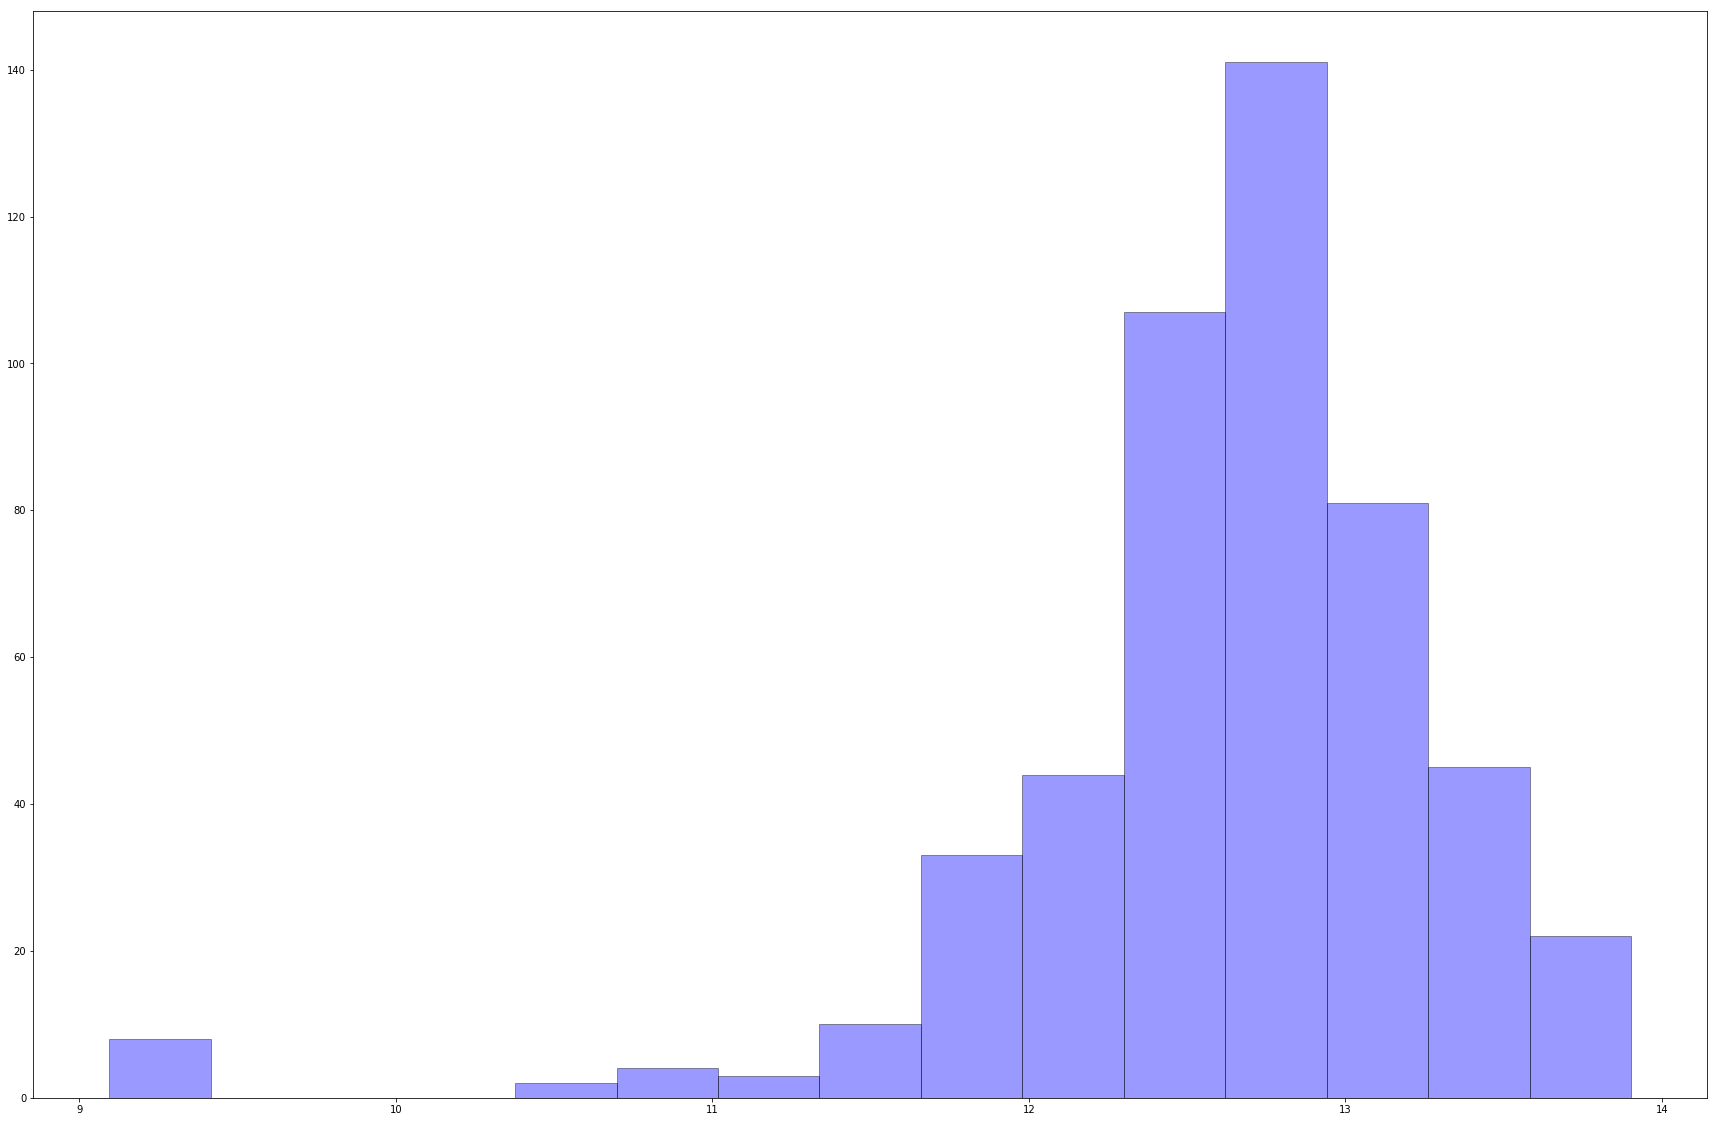

In [226]:
ax = plt.subplots(figsize=(30, 20))
sns.distplot(normalized_imgsize, hist=True, kde=False, 
             bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [68]:
#mode of numpy array
stats.mode(normalized_imgsize, axis=None)

ModeResult(mode=array([12.95335283]), count=array([62]))

In [71]:
#shift normalized mean to mode
new_normalized_mean = 12.95335283

## Remove photos with areas below 2 sd

In [72]:
import numpy as np
results = []
for i in list(listingphotos.URL_BIG):
    img = imread(i)
    area = img.shape[0]*img.shape[1]
    normalized_area = np.log(area)
    if normalized_area < (new_normalized_mean - 2 * normalized_sd):
        r = {"url":i, "verdict":"crappy", "normalized_area": normalized_area}
    else:
        r = {"url":i, "verdict":"not crappy", "normalized_area": normalized_area}
    results.append(r)

#### Eyeball performance

In [73]:
results_df = pd.DataFrame(results)
not_crappy = results_df[results_df.verdict=="not crappy"]
crappy = results_df[results_df.verdict=="crappy"]

#### 1. not crappy photos

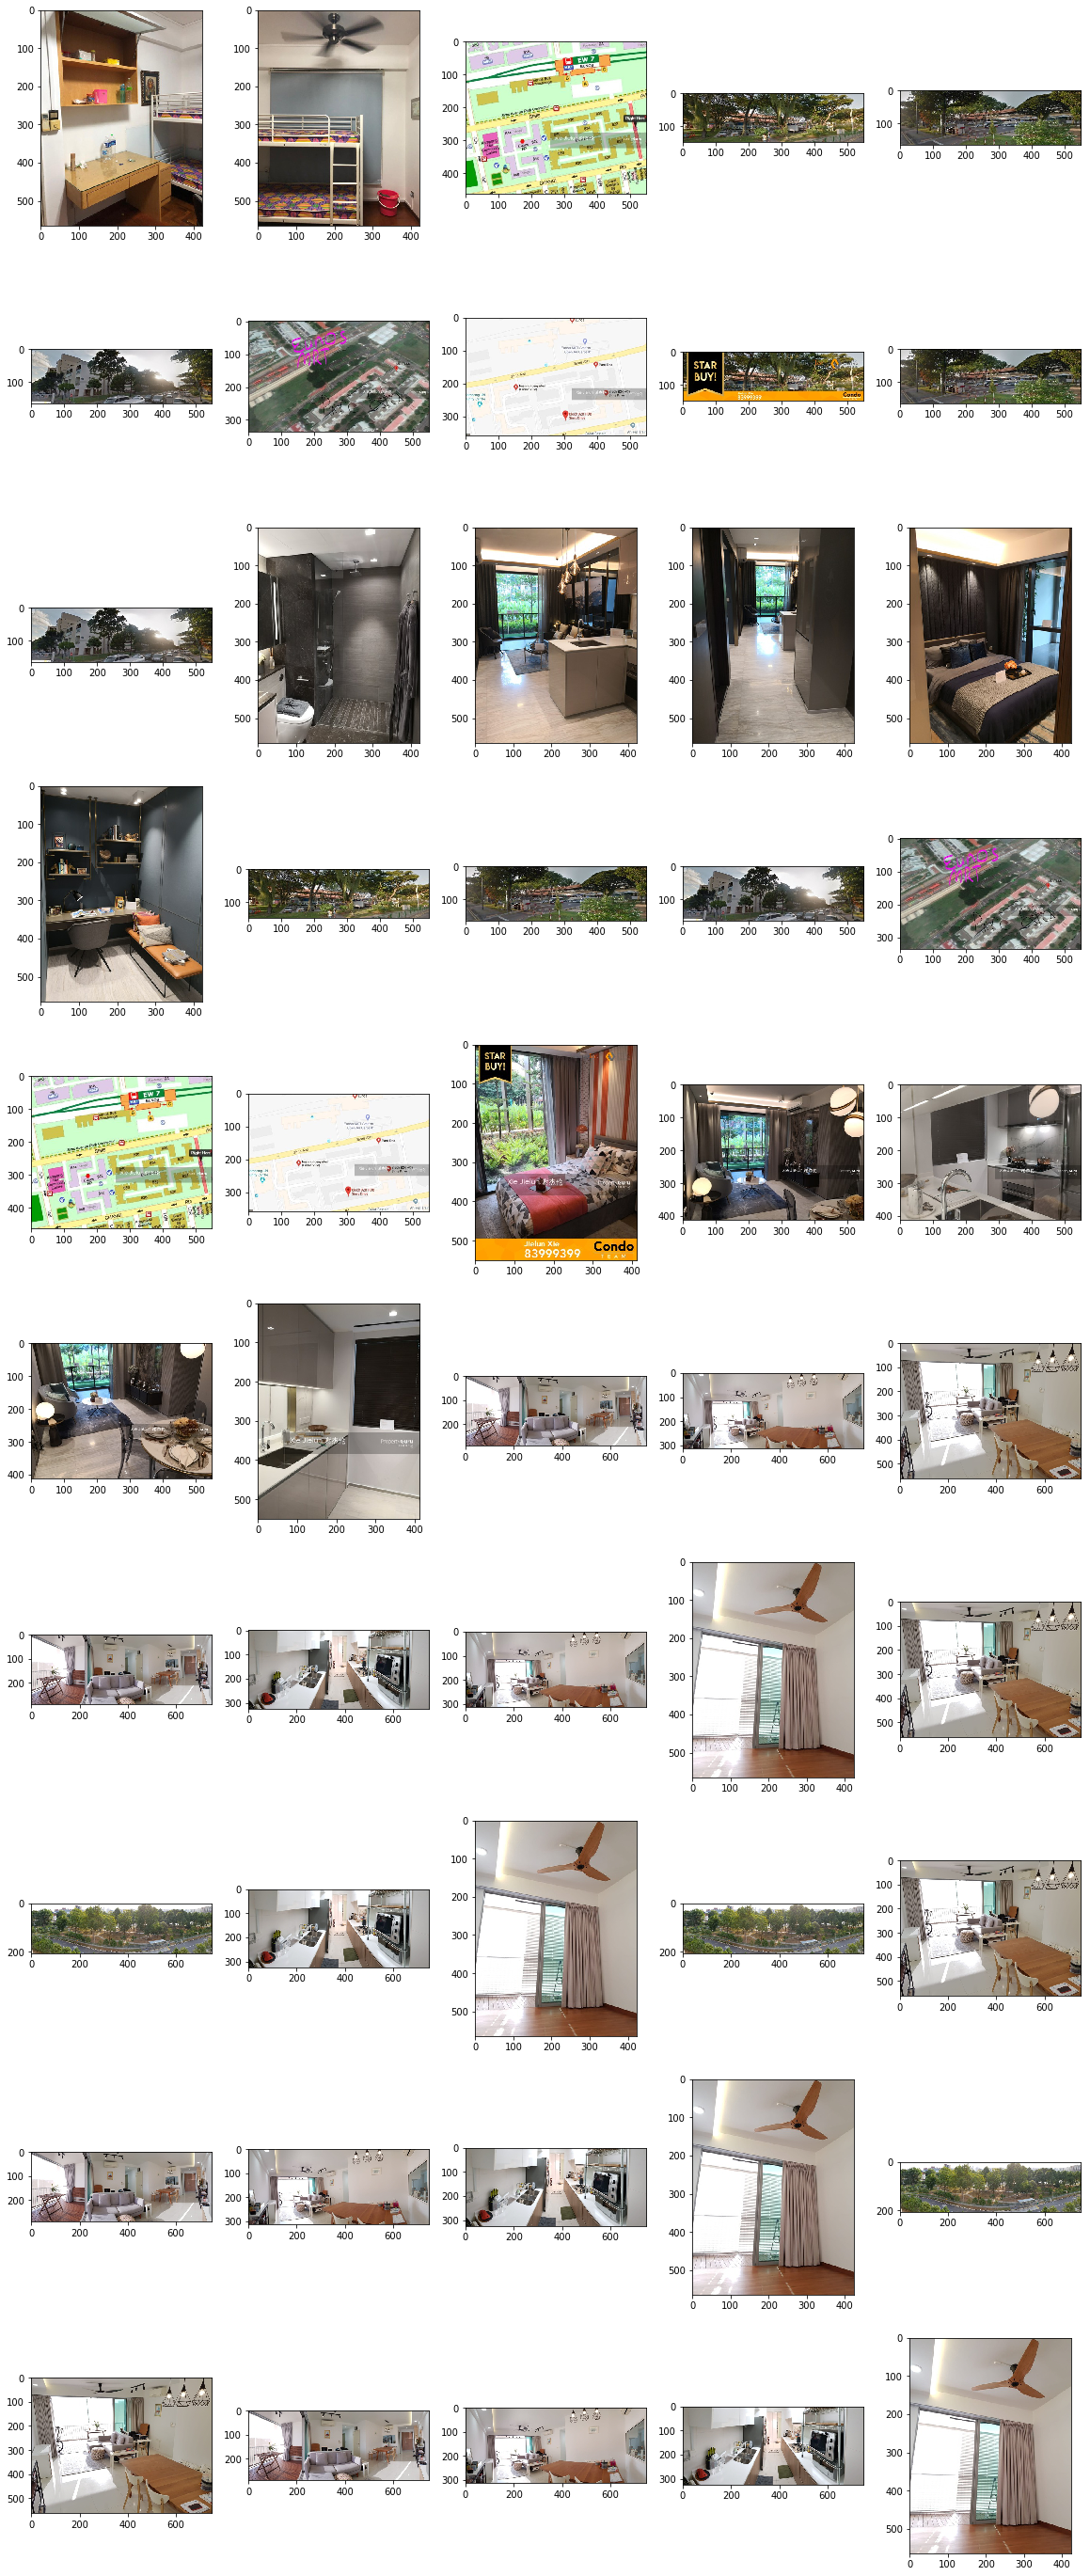

In [74]:
plt.figure(figsize=(20,500))
col = 5
row = int(len(not_crappy)/col)+1
for n, i in enumerate(not_crappy.url[0:50]):
    ax = plt.subplot(row,col,n+1)
    img = imread(i)
    ax.imshow(img)

#### ii. crappy photos

In [75]:
len(crappy.url)

8

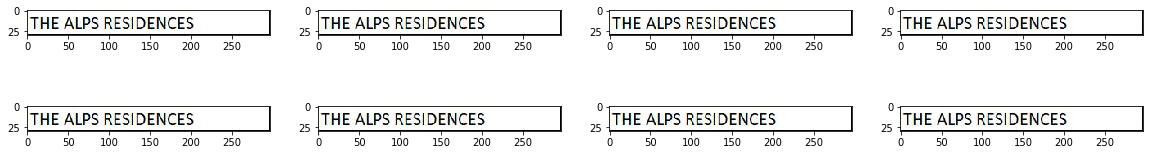

In [76]:
plt.figure(figsize=(20,5))
col = 4
row = int(len(crappy)/col)+1
for n, i in enumerate(crappy.url):
    ax = plt.subplot(row,col,n+1)
    img = imread(i)
    ax.imshow(img)

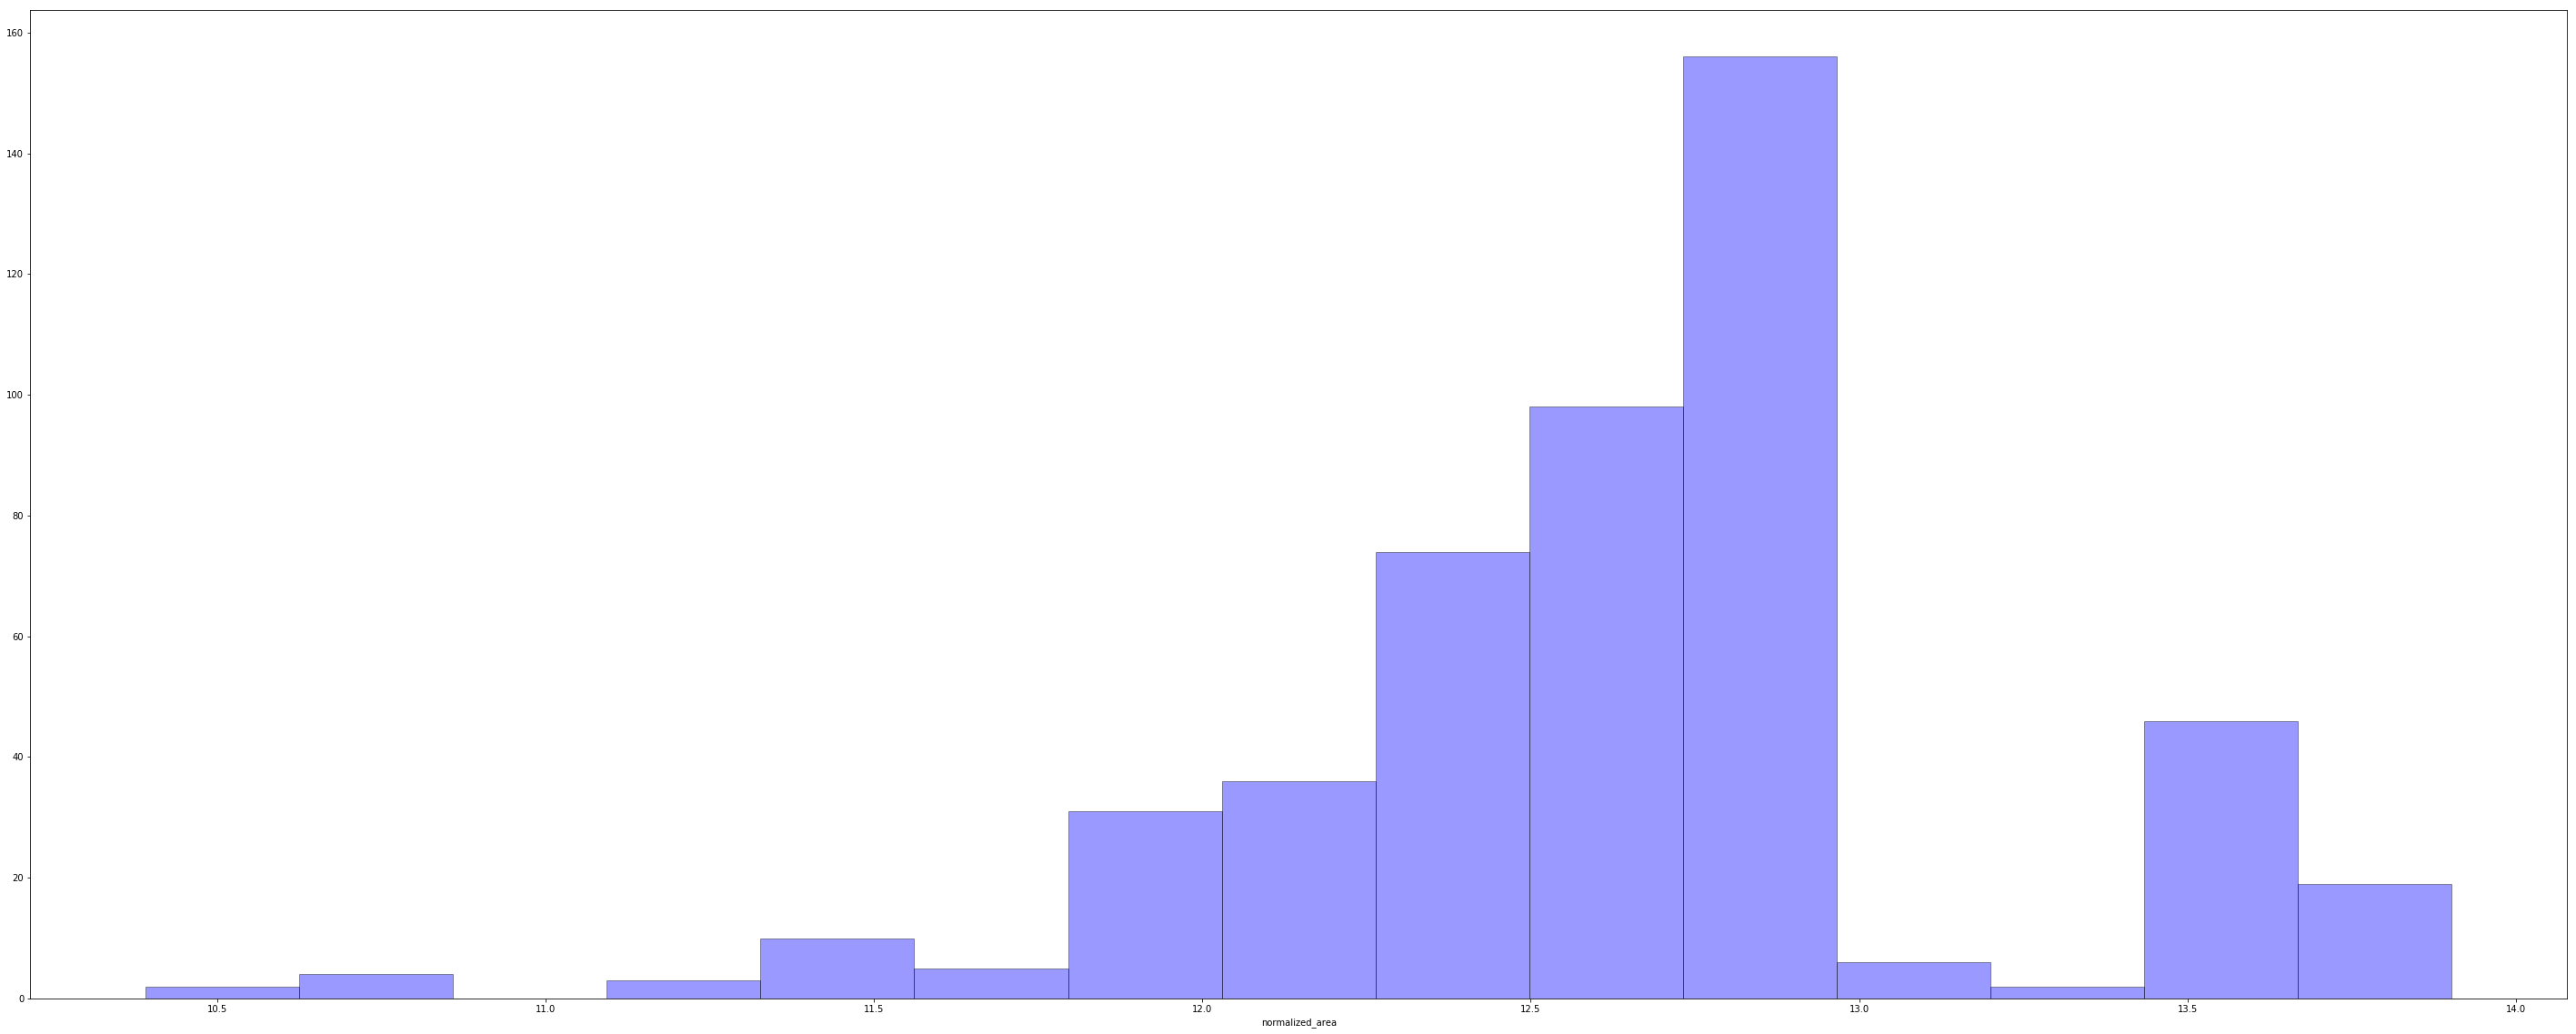

In [225]:
ax = plt.subplots(figsize=(50, 20))
sns.distplot(not_crappy.normalized_area, hist=True, kde=False, 
             bins=15, color = 'blue',
             hist_kws={'edgecolor':'black'})